# Clustering | Assignment

Question 1: What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

| Aspect                | **K-Means Clustering**                                        | **Hierarchical Clustering**                                                       |
| --------------------- | ------------------------------------------------------------- | --------------------------------------------------------------------------------- |
| **Approach**          | Partition-based (divides data into *k* clusters).             | Tree-based (builds a hierarchy of clusters using a dendrogram).                   |
| **Input Requirement** | Requires number of clusters (*k*) to be specified in advance. | Does not require pre-specifying *k* (can cut the dendrogram at different levels). |
| **Cluster Shape**     | Works best for spherical (round) and equally sized clusters.  | Can capture complex cluster shapes and nested structures.                         |
| **Scalability**       | Efficient for large datasets (time complexity \~O(n)).        | Computationally expensive for large datasets (time complexity \~O(n²)).           |
| **Result**            | Produces a flat set of clusters.                              | Produces a hierarchy (clusters within clusters).                                  |
| **Reproducibility**   | Random initialization may lead to different results.          | Deterministic (same dendrogram every time).                                       |


Use Cases

1. K-Means Clustering Use Case:

Customer segmentation in marketing.

Example: A company wants to divide customers into groups (e.g., budget shoppers, premium buyers, seasonal buyers) based on purchasing behavior. Since they know they want, say, 3–5 groups, K-Means is efficient and effective.

2. Hierarchical Clustering Use Case:

Document or gene similarity analysis.

Example: In bioinformatics, hierarchical clustering is used to build dendrograms showing similarity among gene expression profiles. Since the number of clusters is not known beforehand, the hierarchical tree structure helps researchers explore natural groupings.

Question 2: Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.

  - Got it 👍 Let’s go step by step.

---

## **Silhouette Score in Clustering**

### **Purpose**

The **Silhouette Score** is a metric used to evaluate how well the objects in a dataset are clustered.
It measures **how similar each point is to its own cluster compared to other clusters**.

It helps answer two key questions:

1. Are points **well-matched** to their assigned cluster?
2. Are clusters **well-separated** from each other?

---

### **How It Works**

For each data point $i$:

* $a(i)$ = average distance between $i$ and all other points in the **same cluster** (intra-cluster distance).
* $b(i)$ = minimum average distance between $i$ and points in the **nearest other cluster** (inter-cluster distance).

The **Silhouette Score** for point $i$ is:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

* $s(i)$ ranges from **-1 to +1**:

  * **+1** → point is well-clustered (far from other clusters).
  * **0** → point is on or very close to the cluster boundary.
  * **-1** → point is likely misclassified (closer to another cluster than its own).

The **overall silhouette score** is the average across all points.

---

### **Why It’s Useful**

* Helps compare clustering results with different numbers of clusters (**choose optimal k in K-Means**).
* Identifies poorly separated or overlapping clusters.
* Gives a quantitative measure of cluster quality without needing labels (unsupervised).

---

### **Example Use Case**

Suppose you apply **K-Means** to customer segmentation with $k=3,4,5$.

* If the silhouette score is highest at $k=3$, that indicates 3 is the most natural number of clusters for the dataset.

Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?

  - Great question! Let’s break down **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** 🚀

---

## **Core Parameters of DBSCAN**

DBSCAN mainly relies on **two key parameters**:

1. **ε (epsilon / eps)**

   * The **maximum distance** between two points for one to be considered as in the neighborhood of the other.
   * Controls the **radius of the neighborhood** around a point.
   * **Effect:**

     * Small ε → many small clusters, lots of noise.
     * Large ε → fewer, bigger clusters, risk of merging different groups.

2. **MinPts (Minimum Points)**

   * The **minimum number of points** required within an ε-radius neighborhood for a point to be considered a **core point**.
   * Controls how dense a region must be to form a cluster.
   * **Effect:**

     * Low MinPts → even sparse regions may form clusters.
     * High MinPts → requires denser areas, so fewer but stronger clusters, more points marked as noise.

---

## **How They Influence Clustering**

* **Core Point:** A point with at least `MinPts` neighbors within distance ε.
* **Border Point:** A point within ε of a core point but with fewer than `MinPts` neighbors itself.
* **Noise Point (Outlier):** A point that is neither core nor border.

👉 By tuning **ε** and **MinPts**, DBSCAN:

* Finds clusters of **arbitrary shape** (unlike K-Means which prefers spherical clusters).
* Detects **outliers/noise** naturally.
* Adapts to local density variations (if parameters are chosen well).

---

## **Example Use Case**

* **DBSCAN in anomaly detection** (e.g., fraud detection in transactions):

  * Fraudulent transactions may appear as **noise points** since they don’t belong to any dense cluster of normal transactions.

* **DBSCAN in spatial data** (e.g., GPS data):

  * Identifying clusters of users in different city regions without needing to predefine the number of clusters.

Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

  - Excellent question 🙌 Feature scaling is **crucial** in clustering. Let’s go step by step:

---

## **Why Feature Scaling Matters in Clustering**

Clustering algorithms like **K-Means** and **DBSCAN** rely on **distance metrics** (usually **Euclidean distance**) to group points.

* If features are on **different scales**, the larger-scale features dominate the distance calculation.
* This leads to **biased clusters** that don’t represent the true structure of the data.

---

### **Example**

Suppose we cluster customers based on:

* **Income**: ranges from 20,000 to 200,000
* **Age**: ranges from 18 to 70

Without scaling:

* Differences in **income** (up to 180,000) will overshadow differences in **age** (max 52).
* Clustering will mostly reflect income, almost ignoring age.

After scaling (e.g., Standardization or Min-Max normalization):

* Both income and age contribute equally to distance.
* Clusters reflect **combined influence** of both features.

---

## **Effect on Algorithms**

* **K-Means:**

  * Uses Euclidean distance to assign points to the nearest cluster centroid.
  * Scaling ensures **all features contribute fairly** to distance calculation.

* **DBSCAN:**

  * Uses ε (neighborhood radius) based on distance.
  * If features aren’t scaled, ε will be meaningful only for the feature with the largest scale, making clusters distorted.

---

## **Common Scaling Methods**

1. **Min-Max Normalization (0–1 scaling):**

   $$
   x' = \frac{x - x_{min}}{x_{max} - x_{min}}
   $$

   → Keeps data between 0 and 1.

2. **Standardization (Z-score normalization):**

   $$
   x' = \frac{x - \mu}{\sigma}
   $$

   → Transforms data to have mean 0 and standard deviation 1.

Question 5: What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?

  - Perfect question! Let’s go step by step 🚀

---

## **Elbow Method in K-Means**

### **Purpose**

The **Elbow Method** is a technique used to find the **optimal number of clusters (k)** in **K-Means clustering**.
It balances **model accuracy** vs. **complexity**.

---

### **How It Works**

1. Run **K-Means** with different values of $k$ (e.g., 1 to 10).
2. For each $k$, compute the **Within-Cluster Sum of Squares (WCSS)**, also called **inertia**:

   * WCSS = sum of squared distances of each point to its nearest cluster centroid.
   * Lower WCSS → tighter, better clusters.
3. Plot **k vs. WCSS**.

   * As $k$ increases, WCSS decreases (more clusters → smaller distances).
   * But after a certain point, the improvement is marginal.

The point where the decrease in WCSS **slows down sharply** looks like an **elbow** in the graph.
That **elbow point = optimal number of clusters**.

---

### **Why It Works**

* Too few clusters → high WCSS (clusters are too broad).
* Too many clusters → very low WCSS but overfitting (clusters don’t generalize well).
* The **elbow point** gives the best trade-off between cluster compactness and simplicity.

---

### **Example**

* Suppose you run K-Means on customer data:

  * WCSS decreases rapidly from $k=1$ to $k=3$.
  * After $k=3$, the improvement slows.
  * The elbow is at **k=3**, so you choose 3 clusters (e.g., low, medium, high-value customers).

Dataset:
Use make_blobs, make_moons, and sklearn.datasets.load_wine() as
specified.


Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.

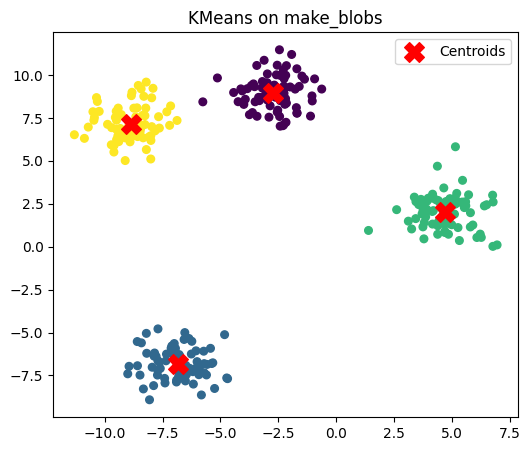

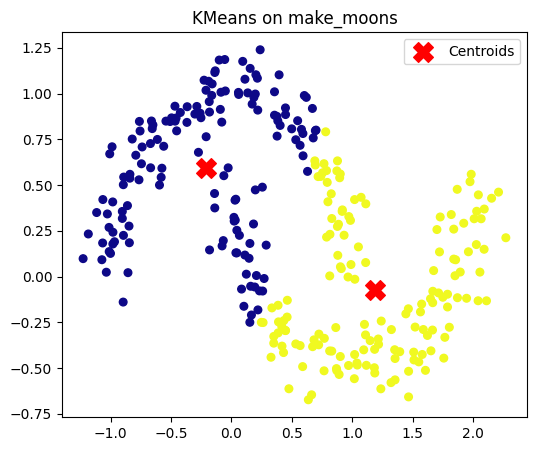

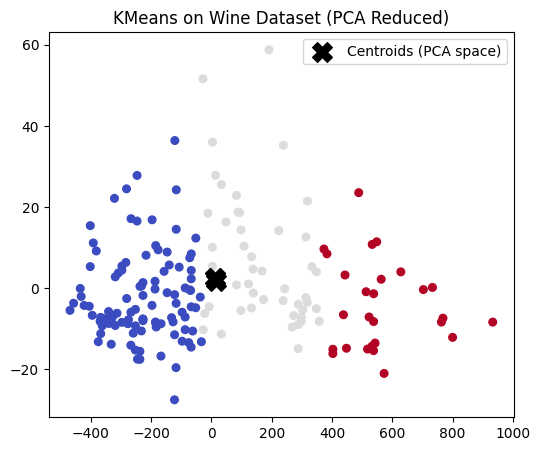

In [1]:
from sklearn.datasets import make_blobs, make_moons, load_wine
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X_blobs, _ = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)
kmeans_blobs = KMeans(n_clusters=4, random_state=42)
y_blobs = kmeans_blobs.fit_predict(X_blobs)

plt.figure(figsize=(6, 5))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap="viridis", s=30)
plt.scatter(kmeans_blobs.cluster_centers_[:, 0], kmeans_blobs.cluster_centers_[:, 1],
            c="red", marker="X", s=200, label="Centroids")
plt.title("KMeans on make_blobs")
plt.legend()
plt.show()

X_moons, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
kmeans_moons = KMeans(n_clusters=2, random_state=42)
y_moons = kmeans_moons.fit_predict(X_moons)

plt.figure(figsize=(6, 5))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap="plasma", s=30)
plt.scatter(kmeans_moons.cluster_centers_[:, 0], kmeans_moons.cluster_centers_[:, 1],
            c="red", marker="X", s=200, label="Centroids")
plt.title("KMeans on make_moons")
plt.legend()
plt.show()

wine = load_wine()
X_wine = wine.data

pca = PCA(n_components=2)
X_wine_pca = pca.fit_transform(X_wine)

kmeans_wine = KMeans(n_clusters=3, random_state=42)
y_wine = kmeans_wine.fit_predict(X_wine)

plt.figure(figsize=(6, 5))
plt.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1], c=y_wine, cmap="coolwarm", s=30)
plt.scatter(kmeans_wine.cluster_centers_[:, 0], kmeans_wine.cluster_centers_[:, 1],
            c="black", marker="X", s=200, label="Centroids (PCA space)")
plt.title("KMeans on Wine Dataset (PCA Reduced)")
plt.legend()
plt.show()


Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

wine = load_wine()
X_wine = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_wine)

dbscan = DBSCAN(eps=2.0, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters found (excluding noise):", n_clusters)


Number of clusters found (excluding noise): 5


Question 8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.

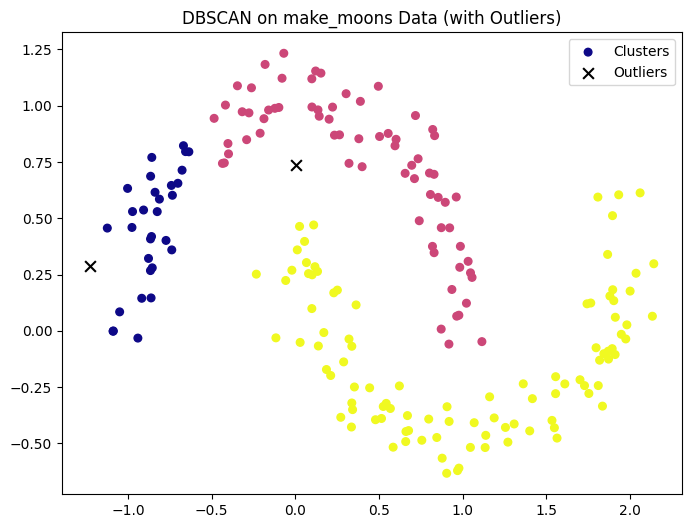

In [3]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X_moons, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X_moons)

outliers = labels == -1

plt.figure(figsize=(8, 6))
plt.scatter(X_moons[~outliers, 0], X_moons[~outliers, 1],
            c=labels[~outliers], cmap="plasma", s=30, label="Clusters")
plt.scatter(X_moons[outliers, 0], X_moons[outliers, 1],
            c="black", marker="x", s=60, label="Outliers")
plt.title("DBSCAN on make_moons Data (with Outliers)")
plt.legend()
plt.show()

Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.

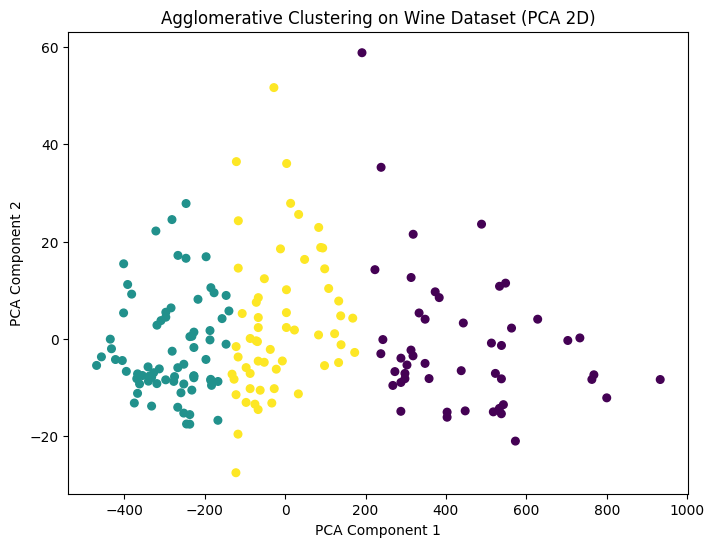

In [4]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

wine = load_wine()
X_wine = wine.data

pca = PCA(n_components=2)
X_wine_pca = pca.fit_transform(X_wine)

agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(X_wine_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1], c=labels, cmap="viridis", s=30)
plt.title("Agglomerative Clustering on Wine Dataset (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:

● Which clustering algorithm(s) would you use and why?

● How would you preprocess the data (missing values, scaling)?

● How would you determine the number of clusters?

● How would the marketing team benefit from your clustering analysis?

  - ## **1. Choosing Clustering Algorithm(s)**

* **K-Means**:

  * Efficient for large datasets.
  * Works well when clusters are expected to be **spherical and balanced** (e.g., budget vs. premium customers).
* **DBSCAN / Hierarchical Clustering**:

  * Useful if clusters may have **arbitrary shapes** or if you want to detect **outliers** (e.g., unusual purchasing behavior).
* **Approach**: Start with **K-Means** for segmentation, then test **DBSCAN** to detect niche customer groups and anomalies.

---

## **2. Preprocessing the Data**

* **Handle Missing Values**:

  * For demographics: impute with median (e.g., age, income) or mode (e.g., gender).
  * For purchase history: treat missing values as zeros (no purchase in that category).
* **Feature Engineering**:

  * Aggregate spend across product categories.
  * Compute recency, frequency, and monetary value (**RFM features**).
* **Scaling**:

  * Apply **StandardScaler** or **Min-Max scaling**.
  * Required because features like "annual income" and "number of purchases" are on very different scales.

---

## **3. Determining the Number of Clusters**

* **Elbow Method** (plot WCSS vs. number of clusters).
* **Silhouette Score** (measure cohesion/separation).
* **Business Context**: Sometimes marketing wants a practical number (e.g., 3–6 segments).
* Combine **quantitative metrics** + **business needs**.

---

## **4. Benefits for the Marketing Team**

Clustering provides **customer segments** that enable targeted promotions:

* **Segment Examples**:

  * High-spending loyal customers → VIP rewards.
  * Price-sensitive customers → discount promotions.
  * Occasional seasonal buyers → holiday campaigns.
  * Outliers → potential fraud detection or niche customers.
* **Outcome**:

  * Personalized marketing → higher conversion rates.
  * Better allocation of marketing budget.
  * Improved customer satisfaction and retention.